Here we show the summary plots for the full dataset of spatial proteomics data. We choose to visualize cell concepts by hexbin plots.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '/scr/gmachi/prospection/K2/src')
from utils import deserialize, serialize, deserialize_model

In [3]:
import os
# dataset = "/scr/biggest/gmachi/datasets/celldive_lung/prospected/k9r3fc_concept_overlay"
dataset = "/scr/biggest/gmachi/datasets/celldive_lung/prospected_final/k12r5fc_concept_overlay"
N = len(os.listdir(dataset))
print(N)

109


In [4]:
idx = 0
graphs = os.listdir(dataset)

G_name = graphs[idx]
G = os.path.join(dataset, G_name)
G = deserialize(G)
print(G.nodes[0]["cell_type"])

2.0


In [5]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import numpy as np

# deals with more than 20 colors
CMAP2 = "Pastel2"
joint_cmap = colors.ListedColormap(cm.tab20.colors + cm.Pastel2.colors, name='tab40')
joint_cmap.set_bad(color='lightgray') #used to be white

colors_type = ["thistle", "orchid"] # plum
cmap_type = colors.ListedColormap(colors_type)
norm_type = colors.BoundaryNorm(np.arange(0.5,3), cmap_type.N) 


In [11]:
# from scipy import stats
import ipdb

def mean_over_cutoff(x):
    return float(np.mean(x) > 0)

def mode_concept(x):
    # print(x)
    vals, counts = np.unique(x, return_counts=True)
    index = np.nanargmax(counts)
    # print(vals, counts, index, "-->", vals[index])
    # ipdb.set_trace()
    return float(vals[index])

def visualize_concept_hexbin(G, concept, ax):
    # Extract basic node attributes
    node_coords = [G.nodes[n]['center_coord'] for n in G.nodes]
    node_coords = np.stack(node_coords, 0)
    node_vals = [1 if G.nodes[n]["concept"] == concept else 0 for n in G.nodes]
    min_val, max_val = np.nanmin(node_vals), np.nanmax(node_vals)

    colors_custom = [joint_cmap(np.nan), joint_cmap(concept)] 
    cmap_custom = colors.LinearSegmentedColormap.from_list("Custom", colors_custom, N=100)

    ax.hexbin(node_coords[:, 0], node_coords[:, 1], C=node_vals, gridsize=30, cmap=cmap_custom, reduce_C_function=mean_over_cutoff)
    ax.axis('off')
    return ax

def visualize_concept_mode(G, ax):
    # Extract basic node attributes
    node_coords = [G.nodes[n]['center_coord'] for n in G.nodes]
    node_coords = np.stack(node_coords, 0)
    node_vals = [int(G.nodes[n]["concept"]) for n in G.nodes]
    min_val, max_val = np.nanmin(node_vals), np.nanmax(node_vals)
    # print(min_val, max_val)

    colors_custom = [joint_cmap(concept) for concept in range(0,12)] 
    cmap_custom = colors.LinearSegmentedColormap.from_list("Custom", colors_custom, N=100)
    ax.hexbin(node_coords[:, 0], node_coords[:, 1], C=node_vals, gridsize=30, cmap=cmap_custom, reduce_C_function=mode_concept)
    ax.set_xticks([])  # Hide x ticks
    ax.set_yticks([])  # Hide y ticks
    ax.spines[:].set_visible(False)
    return ax

def visualize_types(G, ax):
    # Extract basic node attributes
    node_coords = [G.nodes[n]['center_coord'] for n in G.nodes]
    node_coords = np.stack(node_coords, 0)
    node_vals = [int(G.nodes[n]["cell_type"]) for n in G.nodes]
    min_val, max_val = np.nanmin(node_vals), np.nanmax(node_vals)
    
    # unique_cell_types = sorted(set([G.nodes[n]["cell_type"] for n in G.nodes]))
    # cell_type_to_color = {ct: cmap_type(i) for i, ct in enumerate(unique_cell_types)}
    # node_colors = [cell_type_to_color[G.nodes[n][key]] for n in G.nodes]

    colors_custom = [cmap_type(concept) for concept in range(0,2)] 
    cmap_custom = colors.LinearSegmentedColormap.from_list("Custom", colors_custom, N=100)

    ax.hexbin(node_coords[:, 0], node_coords[:, 1], C=node_vals, gridsize=30, cmap=cmap_custom, reduce_C_function=mode_concept)
    # cmap=norm_type
    
    ax.set_xticks([])  # Hide x ticks
    ax.set_yticks([])  # Hide y ticks
    ax.spines[:].set_visible(False)
    return ax

1 11
0 11
1 11
0 9
0 10
0 11
0 11
0 11
0 11
1 11
0 11
0 11
0 10
0 10
0 11
0 11
0 11
0 11


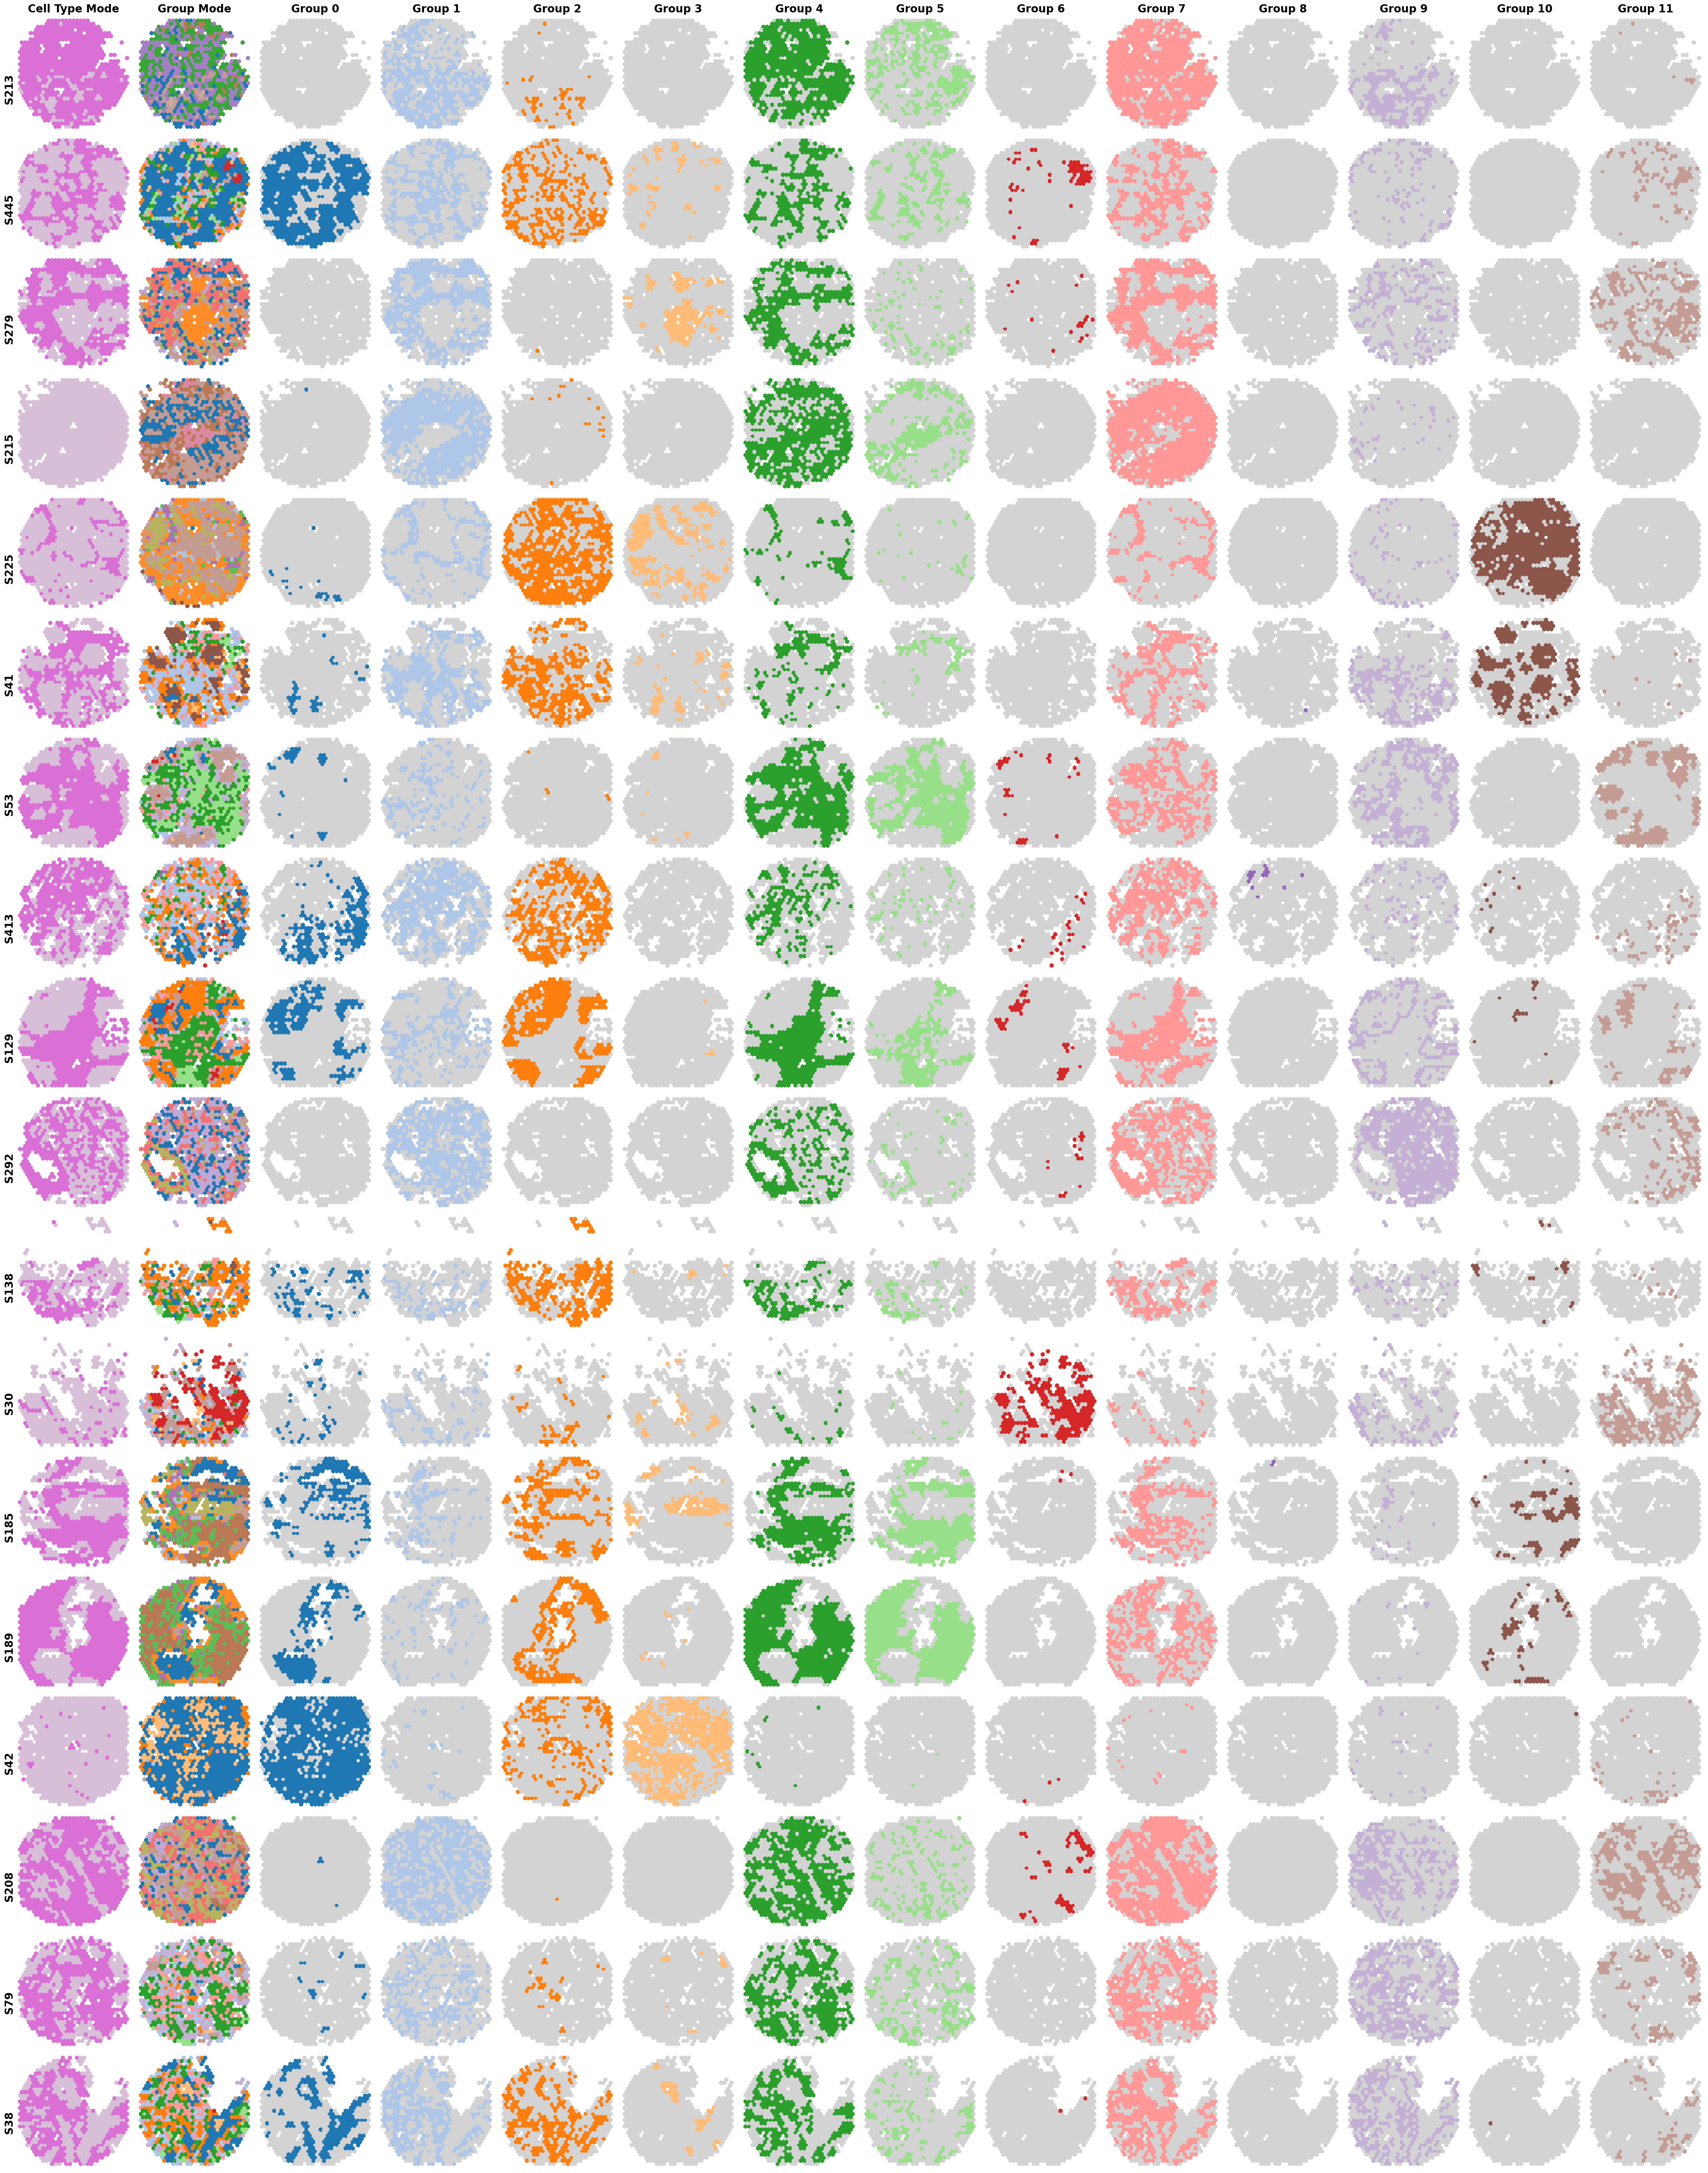

In [12]:
desired_sheet = 0
# idx = desired_sheet * 14
idx = 0
num_per_sheet = 18

for sheet in range(int(np.ceil(N / num_per_sheet))):
    if sheet != desired_sheet:
        idx += num_per_sheet
        continue
    
    # Create a figure and a 10x14 grid of subplots
    fig, axes = plt.subplots(nrows=num_per_sheet, ncols=14, figsize=(44, 56)) # 40, 56
    
    # Enable constrained layout for proper spacing
    plt.rcParams.update({'figure.constrained_layout.use': True})
    # Adjust spacing for better readability
    # plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Add titles to the top row
    for j, ax in enumerate(axes[0]):
        if j == 0:
            title = "Cell Type Mode"
        elif j == 1:
            title = "Group Mode"
        else:
            title = f'Group {j-2}'
        ax.set_title(title, fontsize=20, fontweight='bold')

    # Iterate over each subplot
    for i, ax_row in enumerate(axes):
        for j, ax in enumerate(ax_row):
            try:
                G_name = graphs[idx]
            except IndexError:
                ax.axis('off')
                continue
            
            G = os.path.join(dataset, G_name)
            G = deserialize(G)
            if j == 0:
                ax = visualize_types(G, ax)
                ax.set_ylabel(G_name.split("_")[0], fontsize=20, fontweight="bold", rotation=90, labelpad=10, va='center', ha='right')
            elif j == 1:
                ax = visualize_concept_mode(G, ax)
            elif j > 1:
                ax = visualize_concept_hexbin(G, j-2, ax)
        
        idx += 1    
            
            
    # Show the plot
    plt.show()
    # if sheet == 0:
    #     break
    